In [1]:
import pandas as pd
import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE
import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', '{:.3g}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 400)

In [37]:
data = (
    pd.read_excel('neut_data/220711_1C04_5G04_frac_infectivity.xlsx')
    .rename(columns={
        'mAb': 'serum', # neutcurve package refers to all Ab samples as 'sera'
        'concentration': 'concentration'
    })
)

data.head(20)

,serum,virus,replicate,concentration,fraction infectivity
0,1C04,HK19,1,0.000488,0.932
1,1C04,HK19,1,0.000977,0.813
2,1C04,HK19,1,0.00195,0.728
3,1C04,HK19,1,0.00391,0.548
4,1C04,HK19,1,0.00781,0.361
5,1C04,HK19,1,0.0156,0.184
6,1C04,HK19,1,0.0312,0.0911
7,1C04,HK19,1,0.0625,0.0207
8,1C04,HK19,1,0.125,-0.0137
9,1C04,HK19,1,0.25,-0.0289


In [25]:
data = data.loc[(data['concentration'] != 1) &
                (data['concentration'] != 20) &
                (data['concentration'] != 0.5) &
                (data['virus'] != 'H6')
               ]

In [32]:
data_1c04 = data.loc[data['serum'] == '1C04']
data_5g04 = data.loc[data['serum'] == '5G04']

In [33]:
data_5g04

,serum,virus,replicate,concentration,fraction infectivity
48,5G04,HK19,1,0.00977,0.904
49,5G04,HK19,1,0.0195,0.914
50,5G04,HK19,1,0.0391,0.796
51,5G04,HK19,1,0.0781,0.788
52,5G04,HK19,1,0.156,0.755
53,5G04,HK19,1,0.312,0.589
54,5G04,HK19,1,0.625,0.423
55,5G04,HK19,1,1.25,0.299
56,5G04,HK19,1,2.5,0.0666
57,5G04,HK19,1,5,-0.0588


In [45]:
fits = neutcurve.CurveFits(data, fixtop=False, fixbottom=False)

for serum in fits.sera:
    print(f"Viruses measured against {serum}:\n" +
          str(fits.viruses[serum]))

Viruses measured against 1C04:
['HK19', 'H6']
Viruses measured against 5G04:
['HK19', 'H6']


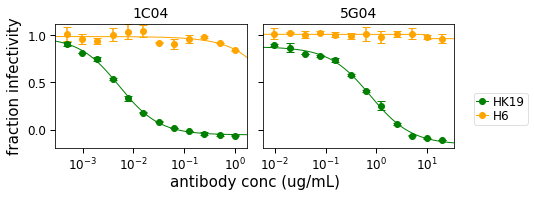

In [46]:
fig, axes = fits.plotSera(ncol=2,
                          xlabel='antibody conc (ug/mL)',
                          virus_to_color_marker={
                              'HK19': ('green', 'o'),
                              'H6': ('orange', 'o')},
                          sharex = False
                         )

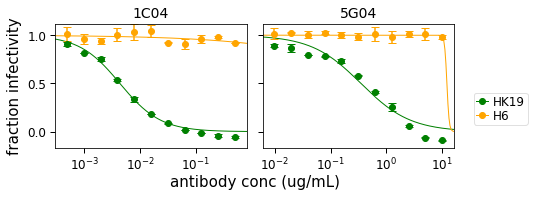

In [11]:
fig, axes = fits.plotSera(ncol=2,
                          xlabel='antibody conc (ug/mL)',
                          virus_to_color_marker={
                              'HK19': ('green', 'o'),
                              'H6': ('orange', 'o')},
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [8.2, 3.5]])
# plt.savefig('figures/220711_1C04_5G04_neut-curves.pdf', bbox_inches=bbox)

In [9]:
fits.fitParams(ics=[50,99])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,1C04,HK19,average,2,0.00433,interpolated,0.00433,0.203,interpolated,0.203,0.00433,1.19,1,0
1,1C04,H6,average,2,1,lower,>1,1,lower,>1,23,0.58,1,0
2,5G04,HK19,average,2,0.348,interpolated,0.348,20,lower,>20,0.348,1.01,1,0
3,5G04,H6,average,2,20,lower,>20,20,lower,>20,81.9,2.28,1,0


In [47]:
fits.fitParams(ics=[50,99])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,1C04,HK19,average,2,0.00457,interpolated,0.00457,0.0622,interpolated,0.0622,0.00523,1.1,0.978,-0.0542
1,1C04,H6,average,2,1,lower,>1,1,lower,>1,6.65e+03,0.876,0.985,-306
2,5G04,HK19,average,2,0.452,interpolated,0.452,3.59,interpolated,3.59,0.762,1.06,0.877,-0.157
3,5G04,H6,average,2,20,lower,>20,20,lower,>20,9.93,27.8,1.01,0.963
